In [20]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve , auc


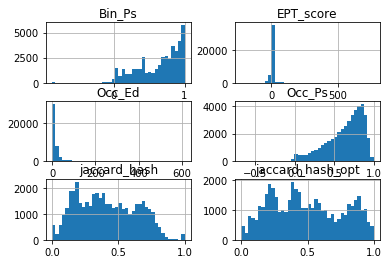

EPT_score
0.5875348553241184
Occ_Ed
0.5268210509929028
Occ_Ps
0.5714076227238744
Bin_Ps
0.5463278779713231
jaccard_hash
0.6155020476648903
jaccard_hash_opt
0.6200974886784894


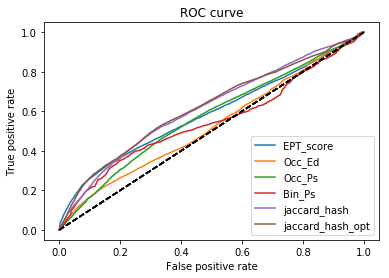

EPT_score
Occ_Ed
Occ_Ps
Bin_Ps
jaccard_hash
jaccard_hash_opt


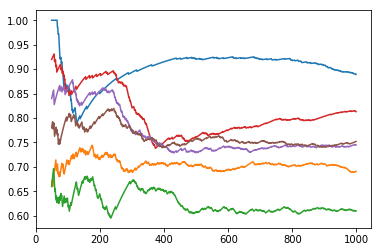

In [21]:
hists = 'EPT_score Occ_Ed Occ_Ps Bin_Ps jaccard_hash jaccard_hash_opt'.split()
totaldf = pd.read_csv('../validation_set/humanwopt.csv')
#totaldf = pd.read_csv('./validation_set/yeast_real_scores.csv')
totaldf[hists].hist( bins = 40 )
totaldf['Occ_Ed'] = - totaldf['Occ_Ed'] 
plt.show()
for score in hists:
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=True)
    #sub = sub.iloc[0:1000]
    #sub1 = sub.iloc[0:500]
    #sub2 = sub.iloc[-500:]
    #sub = pd.concat([sub1,sub2])
    y_test = sub.truth
    y_pred = (sub[score]  - sub[score].min()) / (sub[score].max() - sub[score].min()) 
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(score)
    print(roc_auc)
    
    plt.plot(fpr, tpr, label=score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
plt.show()

for score in hists:
    print(score)
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=False)
    sub = sub.iloc[0:1000]
    sub['mean'+score] = sub.truth.expanding(min_periods=50).mean()
    plt.plot(range(len(sub)), sub['mean'+score], label=score)
plt.show()



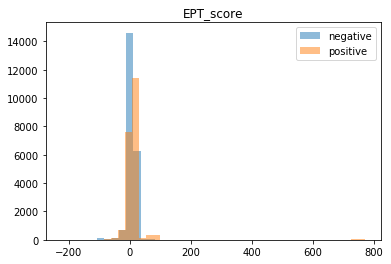

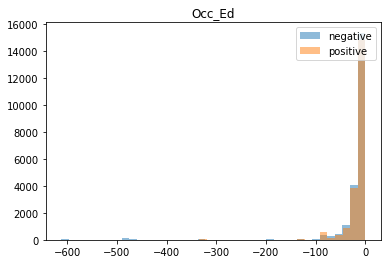

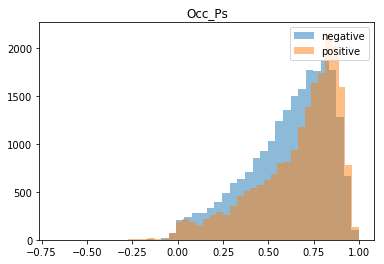

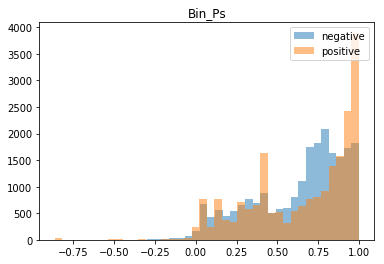

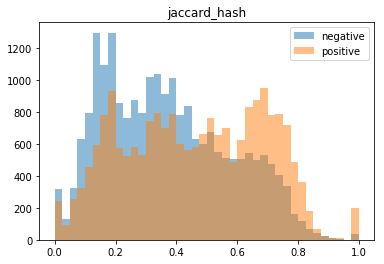

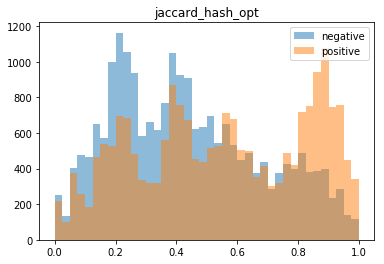

In [17]:



for score in hists:
    plt.clf()
    sub = totaldf[[score,'truth']]   
    sub = sub.sort_values(score, axis = 0 , ascending=True)
    #sub = sub.iloc[0:1000]
    #sub1 = sub.iloc[0:500]
    #sub2 = sub.iloc[-500:]
    #sub = pd.concat([sub1,sub2])
    plt.hist(sub[score][sub.truth==0], bins=40, alpha=0.5, label='negative')
    plt.hist(sub[score][sub.truth==1], bins=40, alpha=0.5, label='positive')
    plt.legend(loc='upper right')
    plt.title(score)
    plt.show()